<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artificial Intelligence - Mr. Samiei
</font>
<br/>
<br/>
Spring 2023

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment(Particle Filtering)
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Ordibehesht 29th - 23:59
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Info
Student number = 99105678
Name =   Kiarash
Last_Name = Kianian

## Libraries

In [ ]:
! pip install numpy
! pip install matplotlib

# Particle Filter (50 Points)

<font size=4>
Author: Erfan Sadraiye
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

This notebook demonstrates the use of a particle filter to estimate the location of an object moving on a 2D map using a noisy sensor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ParticleFilter Class

The ParticleFilter class implements a particle filter for the given problem. It contains the following methods:


In [10]:
import random

import numpy as np


class ParticleFilter:

    def __init__(self, num_particles, map_min, map_max, std):
        """
        :param num_particles: Number of particles to use in the filter.
        :param map_min: Lower bounds of the 2D map.
        :param map_max:  Upper bounds of the 2D map.
        :param std:  Standard deviation of the sensor noise.
        """
        self.num_particles = num_particles
        self.map_min = map_min
        self.map_max = map_max
        self.std = std
        self.particles = None
        self.weights = None
        self.initialize_particles()

    def initialize_particles(self):
        """
        Implement the initialization of particles by creating an array of size (num_particles, 2) and setting its values to random uniform values between map_min and map_max Then, initialize the weights. They should be equal for the particles and sum of them should be 1.
        """
        self.particles = np.zeros((self.num_particles, 2))
        for i in range(self.num_particles):
            x = random.uniform(self.map_min[0], self.map_max[0])
            y = random.uniform(self.map_min[1], self.map_max[1])
            self.particles[i] = (x,y)

        self.weights = np.ones(self.num_particles) / self.num_particles

    def predict_particles(self):
        """
        Implement the prediction step of the particle filter by updating the x and y values of each particle using random Gaussian noise with mean 0 and standard deviation equal to self.std
        """
        for i in range(self.num_particles):
            noise = np.random.normal(0, self.std, size=2)
            self.particles[i] += noise
            if self.particles[i][0] > self.map_max[0]:
                self.particles[i][0] = self.map_max[0]
            if self.particles[i][0] < self.map_min[0]:
                self.particles[i][0] = self.map_min[0]
            if self.particles[i][1] > self.map_max[1]:
                self.particles[i][1] = self.map_max[1]
            if self.particles[i][1] < self.map_min[1]:
                self.particles[i][1] = self.map_min[1]

    def update_weights(self, z):
        """
        Implement the weight update step of the particle filter by updating the weights for each particle based on the distance between the particle's position and the measured position z
        """
        for i in range(self.num_particles):
            particle_pos = self.particles[i]
            distance = np.linalg.norm(particle_pos - z)
            # use gaussian weight which is popular in particle filtering
            weight = np.exp(-0.5 * (distance / self.std) ** 2)
            self.weights[i] = weight
        self.weights /= np.sum(self.weights)

    def resample_particles(self):
        """
        Implement the resampling step of the particle filter by choosing new particles based on the current weights using numpy.random.choice and updating the particles and weights accordingly
        """
        new_particles = np.zeros((self.num_particles, 2))
        for i in range(self.num_particles):
            index = np.random.choice(range(self.num_particles), p=self.weights)
            new_particles[i] = self.particles[index]
        self.particles = new_particles
        self.weights = np.ones(self.num_particles) / self.num_particles


    def run(self, measurements):
        for z in measurements:
            self.predict_particles()
            self.update_weights(z)
            self.resample_particles()
            self.plot_particles(z)

    def plot_particles(self, z):
        plt.scatter(self.particles[:, 0], self.particles[:, 1], color='b', alpha=0.1)
        plt.scatter(z[0], z[1], color='r')
        plt.xlim(self.map_min[0], self.map_max[0])
        plt.ylim(self.map_min[1], self.map_max[1])
        plt.show()

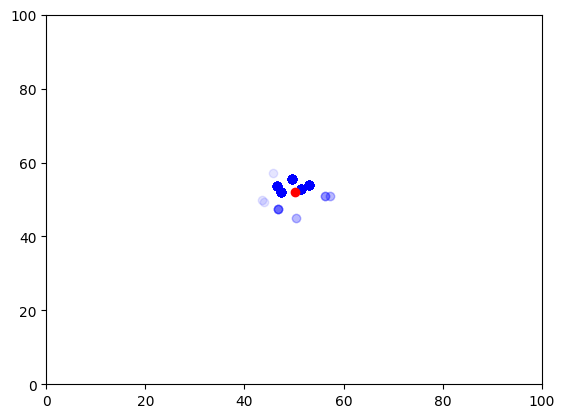

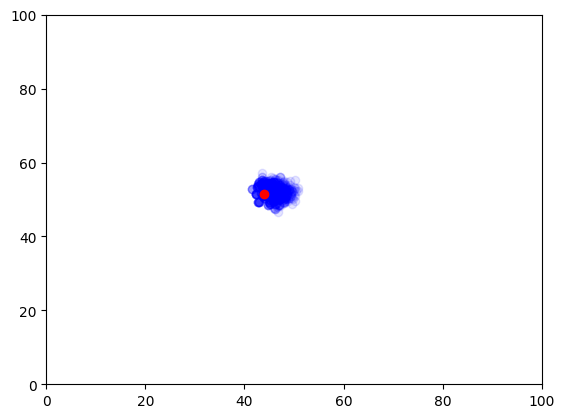

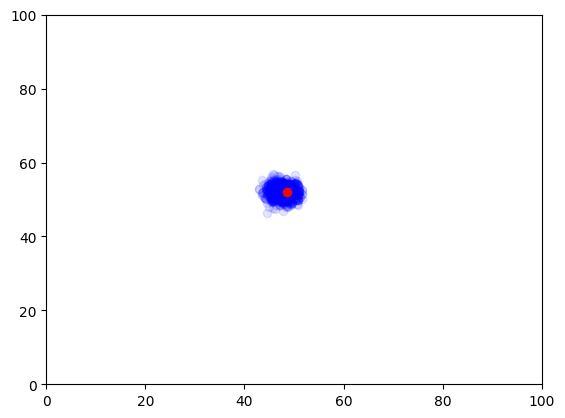

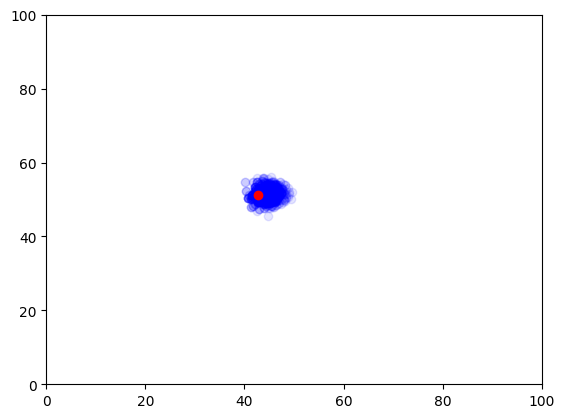

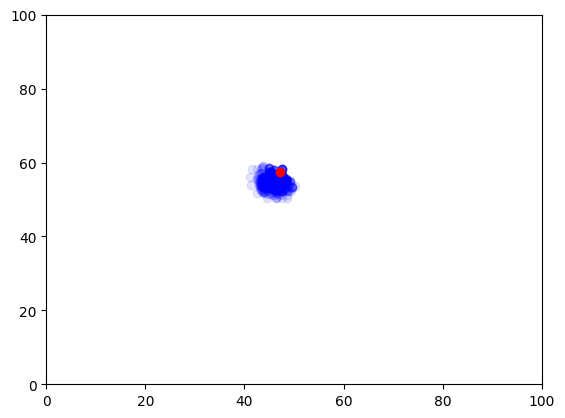

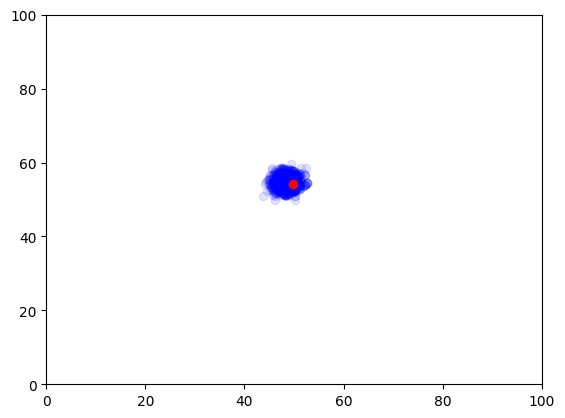

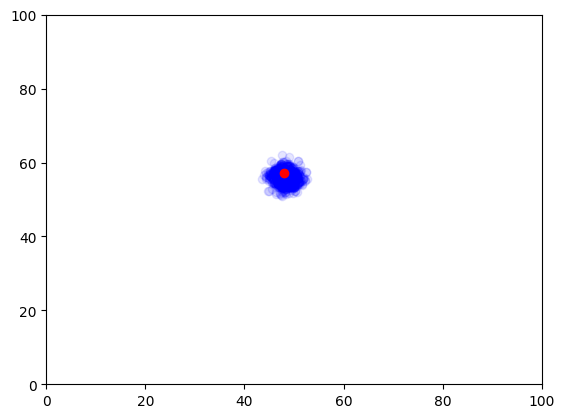

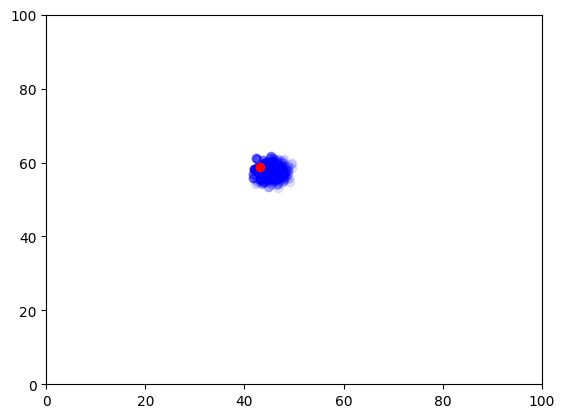

In [11]:
num_particles = 1000
map_min = [0, 0]
map_max = [100, 100]
std = 2.0
number_of_moves = 8
start_location = np.random.normal((map_max[0] - map_min[0]) / 2, 2.0, size=(1, 2))
measurements = np.empty((number_of_moves, 2))
measurements[0, :] = start_location
for i in range(1, number_of_moves):
    measurements[i, :] = measurements[i - 1, :] + np.random.uniform(-5, 5, size=(1, 2))
    measurements[i, :] = np.maximum(measurements[i, :], map_min)
    measurements[i, :] = np.minimum(measurements[i, :], map_max)
measurements += np.random.normal(0, 2.0, size=measurements.shape)
particle_filter = ParticleFilter(num_particles, map_min, map_max, std)
particle_filter.run(measurements)

This generates a sequence of 8 sensor measurements and initializes the particle filter with 1000 particles. The run method of the ParticleFilter object is then called with the sequence of measurements to run the particle filter and display the particle locations at each step.